In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


## The Quastion to answer here is:
# “What sorts of people were more likely to survive?”

## Project Steps

1. Import Necessary Libraries
2. Read In and Explore the Data
3. Features Selection
4. Visualization of the selected data
5. Preprossesing of selected data
6. Which model is the best
7. Saving predections of the best model

## 1. Import Necessary Libraries¶
***
First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn.

In [2]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Read In and Explore the Data

In [3]:
df= pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## First insight of the data

- **Numerical Features:** Age, Fare (both of them continuous) and SibSp, Parch (both of them descrete)
- **Categorical Features:** Survived, Pclass, Sex, Embarked (tha last two have alphanumerical values)


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Further insights
- we can see in the first row, that most of the data have complete cases. There are missing values in the features Age, Cabin and Embarked
- Age could be important feature for the project purposes and w'll have to fill missing values
- Embarked hasn't many missings and they can be replaced easily 
- Cabin has the most missing values but this feature with Ticket and Name I consider as not relevant and will be droped

## Features Selection

In [5]:
# extracting the usefull variablesfrom the original dataframe
train=df.loc[:, ['PassengerId', 'Survived', 'Pclass', 'Sex',
                 'Age', 'SibSp','Parch', 'Fare', 'Embarked' ]]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


So, now we have the presumably improtant features for predicting Survived people on Titanic. In the next step we gain some insights throu visualization of this features
***

## 4. Visualization of the selected data

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924
Percentage of first class who survived: 62.96296296296296
Percentage of second class who survived: 47.28260869565217
Percentage of second class who survived: 24.236252545824847


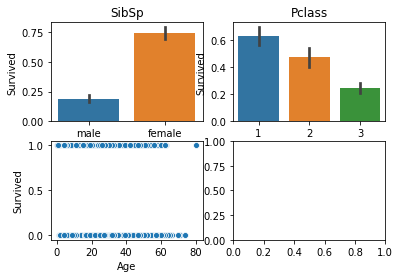

In [6]:
# plot both together to compare
fig, ax=plt.subplots(2,2)
sns.barplot(x='Sex', y=('Survived'),  data=train, ax=ax[0, 0])
ax[0,0].set_title("SibSp")
sns.barplot(x='Pclass', y=('Survived'),  data=train, ax=ax[0, 1])
ax[0,1].set_title("Pclass")
sns.scatterplot(x='Age', y=('Survived'), data=train, ax=ax[1, 0]);


#print percentages of females vs. males that survive
print("Percentage of females who survived:", 
      train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", 
      train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)


#print percentages of first, second and third class passengers that survive
print("Percentage of first class who survived:", 
      train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of second class who survived:", 
      train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of second class who survived:", 
      train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)


- There is a strong difference of the percentage in the sex groups. 74.20% of females survived and from males on the other survived only 18.89%.
- Passengers classes show also similar diffrence. The first class passengers had the most chance to survive, than the second and the third.
- Age shows also a slight indication that the people older than 60 years of age had much less chance to survive

Percentage of none sibling or spouse who survived: 34.53947368421053
Percentage of one sibling or spouse who survived: 53.588516746411486
Percentage of two sibling or spouse who survived: 46.42857142857143
Percentage of three sibling or spouse who survived: 25.0
Percentage of four sibling or spouse who survived: 16.666666666666664
Percentage of none children or parents who survived: 34.365781710914455
Percentage of 1 children or parents  who survived: 55.08474576271186
Percentage of 2 children or parents  who survived: 50.0
Percentage of 3 children or parents  who survived: 60.0
Percentage of 5 children or parents  who survived: 20.0
Percentage of passengers who embarked in Cherbourg who survived: 55.35714285714286
Percentage of passengers who embarked in Queenstown who survived: 38.961038961038966
Percentage of passengers who embarked in Southampton who survived: 33.69565217391305


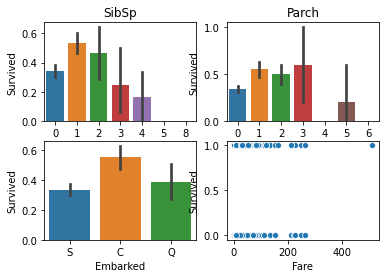

In [7]:
# plot both together to compare
fig, ax=plt.subplots(2, 2)
sns.barplot(x='SibSp', y=('Survived'),  data=train, ax=ax[0, 0])
ax[0,0].set_title("SibSp")
sns.barplot(x='Parch', y=('Survived'),  data=train,  ax=ax[0, 1])
ax[0,1].set_title("Parch")
sns.barplot(x='Embarked', y=('Survived'), data=train, ax=ax[1, 0])
#ax[1, 0].set_title("Embarked")
sns.scatterplot(x='Fare', y=('Survived'), data=train, ax=ax[1, 1]);
#ax[1, 1].set_title("Fare")

#print percentages of passengers with none, one, two, three or four siblings or a spouse that survive
print("Percentage of none sibling or spouse who survived:", 
      train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of one sibling or spouse who survived:", 
      train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of two sibling or spouse who survived:", 
      train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of three sibling or spouse who survived:", 
      train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of four sibling or spouse who survived:", 
      train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)



#print percentages of passengers with none, one, two, three or five children or parents that survive
print("Percentage of none children or parents who survived:", 
      train["Survived"][train["Parch"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of 1 children or parents  who survived:", 
      train["Survived"][train["Parch"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of 2 children or parents  who survived:", 
      train["Survived"][train["Parch"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of 3 children or parents  who survived:", 
      train["Survived"][train["Parch"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of 5 children or parents  who survived:", 
      train["Survived"][train["Parch"] == 5].value_counts(normalize = True)[1]*100)

#print percentages of passengers with different ports of embarkation that survive
print("Percentage of passengers who embarked in Cherbourg who survived:", 
      train["Survived"][train["Embarked"] == 'C'].value_counts(normalize = True)[1]*100)

print("Percentage of passengers who embarked in Queenstown who survived:", 
      train["Survived"][train["Embarked"] == 'Q'].value_counts(normalize = True)[1]*100)

print("Percentage of passengers who embarked in Southampton who survived:", 
      train["Survived"][train["Embarked"] == 'S'].value_counts(normalize = True)[1]*100)

- As we can see the passengers with none siblings or spouse had less chance than the one with one or two siblings or spouse but more chance than the one with three or four siblings
- Further the passengers with none children or parents had less chance to survivel than the one with one, two or three children or parents. Least chance had the one with 5 children
- Port embarkation shows also diffrence for the chances of survival. The passengers who embarked in Cherbourg had most chance for survival, followed by Queenstown. Least chance had the passengers who embarked in Southampton

## 5. Preprossesing of selected data

1. We have to fill the missing in the feature Age and than create the categories of it like Child, Teenager, Adult, Senior
2. We have to fill missing values in the feature Embarked
3. We have to change the alphanumerical values from Sex and Embarked

### Feature Age

***
to fill the missing in the feature Age I use median and not the mean. (Because mean of sensitivity towards outliers of mean)

In [8]:
# filling the missings with median
median= train['Age'].median()
train['Age'].fillna(median, inplace=True)

# Check if it worked
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

***
In next step I create 5 age groups. Data above showed that the different age groups had diffrent chances for survival. Hence it would be appropriate to analyse them in groups and not as a numerical continuous feature

In [9]:
groups = [train['Age'].between(0, 3), 
          train['Age'].between(4, 9), 
          train['Age'].between(10, 18),
          train['Age'].between(19, 59),
          train['Age'].between(60, 80)]
 

values = [1, 2, 3, 4, 5]

train['AgeGroup'] = np.select(groups, values, 0)

# check
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,male,22.0,1,0,7.2500,S,4
1,2,1,1,female,38.0,1,0,71.2833,C,4
2,3,1,3,female,26.0,0,0,7.9250,S,4
3,4,1,1,female,35.0,1,0,53.1000,S,4
4,5,0,3,male,35.0,0,0,8.0500,S,4


In [10]:
groups = [train['Age'].between(0, 3), 
          train['Age'].between(4, 9), 
          train['Age'].between(10, 18),
          train['Age'].between(19, 59),
          train['Age'].between(60, 80)]
 

values = ['Babies', 'Children', 'Teenagers', 'Adults', 'Seniors']

train['AgeGroup_names'] = np.select(groups, values, 0)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,AgeGroup_names
0,1,0,3,male,22.0,1,0,7.2500,S,4,Adults
1,2,1,1,female,38.0,1,0,71.2833,C,4,Adults
2,3,1,3,female,26.0,0,0,7.9250,S,4,Adults
3,4,1,1,female,35.0,1,0,53.1000,S,4,Adults
4,5,0,3,male,35.0,0,0,8.0500,S,4,Adults


In [12]:
train['Survived'].count()

891

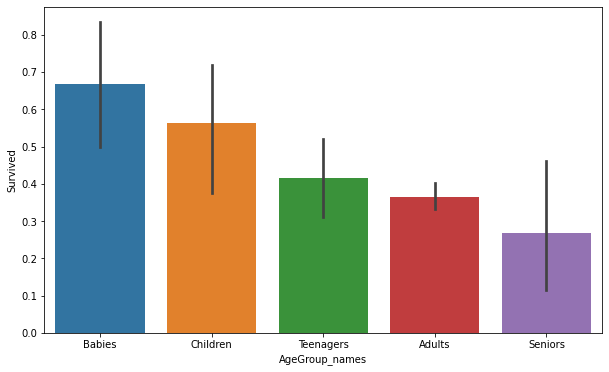

In [13]:
# check

plt.figure(figsize=(10,6))
sns.barplot(x='AgeGroup_names',
            y= 'Survived',  
            data=train, 
            order=['Babies', 'Children', 'Teenagers', 'Adults', 'Seniors']);

We can see that the babies and children had much more chances for survival than the others. They are followed by teenagers, adults and seniors
***

***
We drop Age and AgeGroup_names

In [14]:
train= train.drop(['Age'], axis=1)
train= train.drop(['AgeGroup_names'], axis=1)
#train.head()

### Feature Sex

In [15]:
# converting the values from sex variable into 1 an 0
d = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(d)

#check
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,1,1,0,7.2500,S,4
1,2,1,1,0,1,0,71.2833,C,4
2,3,1,3,0,0,0,7.9250,S,4
3,4,1,1,0,1,0,53.1000,S,4
4,5,0,3,1,0,0,8.0500,S,4


### Feature Embarked

In [16]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

because the Southampton is the most common value for the feature Embarked, we fill missings with S for this port
***

In [17]:
train['Embarked'].fillna(value='S', inplace=True)
# Check
train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [18]:
# converting the values from Embarked variable into 1, 2 and 3
d = {'Q': 1, 'C': 2, 'S': 3}
train['Embarked'] = train['Embarked'].map(d)

#check
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,1,1,0,7.2500,3,4
1,2,1,1,0,1,0,71.2833,2,4
2,3,1,3,0,0,0,7.9250,3,4
3,4,1,1,0,1,0,53.1000,3,4
4,5,0,3,1,0,0,8.0500,3,4


In [19]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

### Prepairing test data acordingly for fiting model

In [20]:
test= pd.read_csv('../input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
# extracting the usefull variablesfrom the original dataframe
test=test.loc[:, ['PassengerId', 'Pclass', 'Sex',
                  'Age', 'SibSp','Parch', 'Fare',
                  'Embarked' ]]
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [22]:
test.describe(include='all')

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418,332.000000,418.000000,418.000000,417.000000,418
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,266,NaN,NaN,NaN,NaN,270
mean,1100.500000,2.265550,NaN,30.272590,0.447368,0.392344,35.627188,NaN
std,120.810458,0.841838,NaN,14.181209,0.896760,0.981429,55.907576,NaN
min,892.000000,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN
25%,996.250000,1.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,1100.500000,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,NaN
75%,1204.750000,3.000000,NaN,39.000000,1.000000,0.000000,31.500000,NaN


***
For the test data we have to fill the missings for Age and one single value for Fare. Rest of them look fine. We have only to change the alphanumerical values in Sex and Embarked

In [23]:
age_median=test['Age'].median()
test['Age'].fillna(value= age_median, inplace=True)

In [24]:
groups = [test['Age'].between(0, 3), 
          test['Age'].between(4, 9), 
          test['Age'].between(10, 18),
          test['Age'].between(19, 59),
          test['Age'].between(60, 76)]
 

values = [1, 2, 3, 4, 5]

test['AgeGroup'] = np.select(groups, values, 0)

# check
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,892,3,male,34.5,0,0,7.8292,Q,4
1,893,3,female,47.0,1,0,7.0000,S,4
2,894,2,male,62.0,0,0,9.6875,Q,5
3,895,3,male,27.0,0,0,8.6625,S,4
4,896,3,female,22.0,1,1,12.2875,S,4


In [25]:
test=test.drop(['Age'], axis=1)

In [26]:
fare_median=test['Fare'].median()
test['Fare'].fillna(value= fare_median, inplace=True)

In [27]:
# converting the values from sex variable into 1 an 0
d = {'male': 1, 'female': 0}
test['Sex'] = test['Sex'].map(d)

#check
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
0,892,3,1,0,0,7.8292,Q,4
1,893,3,0,1,0,7.0000,S,4
2,894,2,1,0,0,9.6875,Q,5
3,895,3,1,0,0,8.6625,S,4
4,896,3,0,1,1,12.2875,S,4


In [28]:
d={'Q':1, 'C':2, 'S':3}
test['Embarked']= test['Embarked'].map(d)

In [29]:
#Check
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
0,892,3,1,0,0,7.8292,1,4
1,893,3,0,1,0,7.0000,3,4
2,894,2,1,0,0,9.6875,1,5
3,895,3,1,0,0,8.6625,3,4
4,896,3,0,1,1,12.2875,3,4


# 6. Which model is the best

### Testing Different Models

- Gaussian Naive Bayes
- Logistic Regression
- Support Vector Machines
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

In [30]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

80.2


In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

82.23


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

72.59


In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

86.29


In [34]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

85.79


In [35]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.76


In [36]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree',  'Gradient Boosting Classifier'],
    'Score': [acc_svc,  acc_logreg, 
              acc_randomforest, acc_gaussian,  acc_decisiontree,
               acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,86.29
2,Random Forest,85.79
5,Gradient Boosting Classifier,83.76
1,Logistic Regression,82.23
3,Naive Bayes,80.20
0,Support Vector Machines,72.59


 **Obviously the model decision tree has the best scoring and we go with that model further**
***

# 7. Saving predections of the best model

In [37]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = decisiontree.predict(test.drop('PassengerId', axis=1))

In [38]:
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

In [39]:
#Check
print(predictions, predictions.size)

[0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 0 1 0 0 0] 418


# End of Notebook